# Project 4: Scraping job listings from Indeed.com and predicting salary of data scientist

## Function to scrape location

In [15]:
import pandas as pd
import re

def get_location(result):
    
    loc = []
    
    # Indeed.com separates search results to top 9 and last row
    # So for each variable, we need to search within 2 different classes separately
    
    for d in result.findAll('div', class_ = "  row  result"):

        try:
            a = d.find('span', class_ = 'location')
            loc.append(a.text.strip())
        except:
            loc.append("None")

    for d in soup.findAll('div', class_ = "lastRow  row  result"):

        try:
            a = d.find('span', class_ = 'location')
            loc.append(a.text.strip())
        except:
            loc.append("None")
    
    return pd.Series(loc)

## Function to scrape company name

In [16]:
def get_company(result):
    
    company = []
    
    for d in result.findAll('div', class_ = "  row  result"):

        try:
            a = d.find('span', class_ = 'company')
            company.append(str(a.text).strip())
        except:
            company.append("None")

    for d in soup.findAll('div', class_ = "lastRow  row  result"):

        try:
            a = d.find('span', class_ = 'company')
            company.append(str(a.text).strip())
        except:
            company.append("None")

    return pd.Series(company)

## Function to scrape job title

In [17]:
def get_job(result):
    
    job = []
    
    for d in result.findAll('div', class_ = "  row  result"):

        try:
            a = d.find(class_ = 'jobtitle')
            job.append(str(a.find('a').text).strip())
        except:
            job.append("None")

    for d in soup.findAll('div', class_ = "lastRow  row  result"):

        try:
            a = d.find(class_ = 'jobtitle')
            job.append(str(a.find('a').text).strip())
        except:
            job.append("None")
        
    return pd.Series(job)



## Function to scrape salary

In [18]:
def get_salary(result):
    sal = []
    
    for d in result.findAll('div', class_ = "  row  result"):

        try:
            a = d.findAll('td', class_ = 'snip')
            sal.append((str(d.nobr)).strip())
        except:
            sal.append("None")

    for d in soup.findAll('div', class_ = "lastRow  row  result"):

        try:
            a = d.findAll('td', class_ = 'snip')
            sal.append((str(d.nobr)).strip())
        except:
            sal.append("None")
    
    return pd.Series(sal)

## Function to scrape number of reviews

In [19]:
def get_review(result):
    rev = []
    
    for d in result.findAll('div', class_ = "  row  result"):

        try:
            a = d.find('span', class_ = 'slNoUnderline').text
            rev.append(str(a).strip())
        except:
            rev.append("None")

    for d in soup.findAll('div', class_ = "lastRow  row  result"):

        try:
            a = d.find('span', class_ = 'slNoUnderline').text
            rev.append(str(a).strip())

        except:
            rev.append("None")

    return pd.Series(rev)
    
    

## Function to scrape company ratings

In [29]:
# Extract ratings from string

def reg_rate(x):
    matchObj = re.findall( r'(\d+\.\d)', x, re.I)
    if matchObj:
        return float(matchObj[0])
    else:
        return 0.

In [30]:
def get_rating(result):
    
    rate = []
    
    for d in result.findAll('div', class_ = "  row  result"):

        try:
            a = d.find('span', class_ = 'rating')['style']
            rate.append(reg_rate(str(a).strip()))
        except:
            rate.append("None")

    for d in soup.findAll('div', class_ = "lastRow  row  result"):

        try:
            a = d.find('span', class_ = 'rating')['style']
            rate.append(reg_rate(str(a).strip()))

        except:
            rate.append("None")

    return pd.Series(rate)
    
    

## Function to scrape job summary

In [22]:
def reg_sum(x):
    
    y = x[45:(len(x) - 7)]
    y = y.replace('<b>', '')
    y = y.replace('</b>', '')
    
    return y.strip()

In [23]:
def get_summary(result):
    
    summ = []
    
    for d in result.findAll('div', class_ = "  row  result"):

        try:
            a = d.find('span', class_ = 'summary')
            summ.append(reg_sum(str(a)))
        except:
            summ.append("None")

    for d in soup.findAll('div', class_ = "lastRow  row  result"):

        try:
            a = d.find('span', class_ = 'summary')
            summ.append(reg_sum(str(a)))
        except:
            summ.append("None")

    return pd.Series(summ)
    
    

## Importing a list of top cities for data science jobs (246 cities in USA)

Source
[Best_cities_for_data_scientists]('https://infogr.am/30f00c18-997e-4a9d-b903-191899a53890')

In [24]:
# Importing a df of cities best for data science

df_cities = pd.read_csv('ds_cities.csv')
df_cities.head()

City State
0    Morrisville    NC
1      Palo Alto    CA
2        Redmond    WA
3  Mountain View    CA
4     El Segundo    CA

## Create a list of city, state, in the form of indeed's web address

In [25]:
# Indeed.com's url format of city, state is like this 'Tucson%2C+AZ'

cities_list = []

for i in range(len(df_cities)):
    x = df_cities.iloc[i, 0] + "%2C+" + df_cities.iloc[i, 1]
    cities_list.append(x)

## Scrap indeed for data scientist jobs in city list (Single page test)

In [26]:
import requests
from bs4 import BeautifulSoup

In [31]:
url = 'http://www.indeed.com/jobs?q=data+scientist&l=Palo+Alto%2C+CA'

results = []

r = requests.get(url)

page = r.content
soup = BeautifulSoup(page, 'lxml')

results.append(get_job(soup))
results.append(get_location(soup))
results.append(get_company(soup))
results.append(get_salary(soup))
results.append(get_review(soup))
results.append(get_rating(soup))
results.append(get_summary(soup))

In [32]:
results

[0    Pivotus Ventures - Data Scientist - Palo Alto
 1                                   Data Scientist
 2                Data Scientist, Core Data Science
 3                        Machine Learning Engineer
 4                           Research Scientist Job
 5                   Data Scientist, Autopilot Maps
 6                                   Data scientist
 7                                   Data Scientist
 8                                   Data Scientist
 9                                   Data Scientist
 dtype: object, 0              Palo Alto, CA
 1              Palo Alto, CA
 2             Menlo Park, CA
 3              Palo Alto, CA
 4              Palo Alto, CA
 5              Palo Alto, CA
 6          Mountain View, CA
 7              Sunnyvale, CA
 8              Sunnyvale, CA
 9    Mountain View, CA 94039
 dtype: object, 0       Umpqua Bank
 1            HP Inc
 2          Facebook
 3           Diffbot
 4              Visa
 5      Tesla Motors
 6           ZingBox
 7 

## Full 246 cities, 300 results per city scrapping

In [33]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={&start={"
url_list = url_template.split('{')
max_results_per_city = 300

results = []

for city in set(cities_list):
    
    for start in range(0, max_results_per_city, 10):
        
        url = url_list[0] + city + url_list[1] + str(start)
        
        r = requests.get(url)
        if str(r) == "<Response [200]>":
            
            page = r.content
            soup = BeautifulSoup(page, 'lxml')
            
            results.append(get_job(soup))
            results.append(get_location(soup))
            results.append(get_company(soup))
            results.append(get_salary(soup))
            results.append(get_review(soup))
            results.append(get_rating(soup))
            results.append(get_summary(soup))
            
        else:
            print "This url is not responding favorably."
            print "url =", url
            print "response =", r
            
        # Grab the results from the request (as above)
        # Append to the full set of results

## Put scrapped materials into dataframe

In [34]:
# Initializing the dataframe

df = pd.DataFrame(results[0:7]).T
print len(df)
df.head()


10


0                       1  \
0  Computer Data Scientist Job        Newport News, VA   
1  Operations Research Analyst             Hampton, VA   
2   Market Research Analyst II  Newport News, VA 23606   
3             Research Analyst             Hampton, VA   
4         Intelligence Analyst       Suffolk, VA 23435   

                                 2                                      3  \
0                             SAIC                                   None   
1                            AECOM                                   None   
2                            Canon                                   None   
3       Thomas Nelson Comm College  <nobr>$55,000 - $64,260 a year</nobr>   
4  Scientific Research Corporation                                   None   

               4     5                                                  6  
0  1,270 reviews  51.6  Computer Data Scientist (Job Number:. The data...  
1  1,810 reviews  43.2  Support data gathering and presentation of DCG...  
2    433 reviews  43.2  Provides support for business planning and mar...  
3      2 reviews    54  Primary responsibilities include meeting with ...  
4     53 reviews  43.8  Analyze data collected, extract evidence and d...

In [35]:
# Number of columns scrapped
m = 7

for n in range(m, (len(results) - m), m):
    
    # Creates an interim df for each page scrapped
    df1 = pd.DataFrame(results[n:(n+m)]).T
    
    # Concatenate column-wise with df
    df = pd.concat([df,df1])

# Labelling each coloumn
df.columns = ['Job Title', 'Location', 'Company', 'Salary', 'No. of Reviews', 'Company Ratings', 'Job Summary']

# Checking df
print len(df)
df.head()

60294


Job Title                Location  \
0  Computer Data Scientist Job        Newport News, VA   
1  Operations Research Analyst             Hampton, VA   
2   Market Research Analyst II  Newport News, VA 23606   
3             Research Analyst             Hampton, VA   
4         Intelligence Analyst       Suffolk, VA 23435   

                           Company                                 Salary  \
0                             SAIC                                   None   
1                            AECOM                                   None   
2                            Canon                                   None   
3       Thomas Nelson Comm College  <nobr>$55,000 - $64,260 a year</nobr>   
4  Scientific Research Corporation                                   None   

  No. of Reviews Company Ratings  \
0  1,270 reviews            51.6   
1  1,810 reviews            43.2   
2    433 reviews            43.2   
3      2 reviews              54   
4     53 reviews            43.8   

                                         Job Summary  
0  Computer Data Scientist (Job Number:. The data...  
1  Support data gathering and presentation of DCG...  
2  Provides support for business planning and mar...  
3  Primary responsibilities include meeting with ...  
4  Analyze data collected, extract evidence and d...

In [36]:
# Dropping duplicates

df.drop_duplicates(inplace = True)
len(df)

11311

In [37]:
df.reset_index(inplace = True, drop = True)

In [38]:
df.to_csv('clean_dropped_dup.csv', encoding='utf-8')

## Data cleaning

In [41]:
# Convert money in string form of $100,000 or $20 into float values

def conv_money(x):
    
    if ',' in x:
        x = x[1:].split(',')
        y = float(x[0] + x[1])
    else:
        y = float(x[1:])
    
    return y

In [42]:
# Find salary values - lower

def reg_sal_low(x):
    matchObj = re.findall( r'(\$\d+\W?\d*\s)', x, re.I)
    if matchObj:
        return conv_money(matchObj[0])
    else:
        return 0.

In [43]:
# Find salary values - higher

def reg_sal_high(x):
    matchObj = re.findall( r'(\$\d+\W?\d*\s)', x, re.I)
    if matchObj:
        try:
            return conv_money(matchObj[1])
        except:
            return conv_money(matchObj[0])
    else:
        return 0.


In [44]:
# Get frequency of salary

def reg_sal_freq(x):
    
    matchObj = re.findall( r'(year|month|hour|day)', x, re.I)
    if matchObj:
        return matchObj[0]
    else:
        return 'None'

In [45]:
df['Salary Lower'] = df['Salary'].apply(reg_sal_low)

In [46]:
df['Salary Higher'] = df['Salary'].apply(reg_sal_high)

In [47]:
df['Salary Frequency'] = df['Salary'].apply(reg_sal_freq)

In [48]:
df.head(2)

Job Title          Location Company Salary  \
0  Computer Data Scientist Job  Newport News, VA    SAIC   None   
1  Operations Research Analyst       Hampton, VA   AECOM   None   

  No. of Reviews Company Ratings  \
0  1,270 reviews            51.6   
1  1,810 reviews            43.2   

                                         Job Summary  Salary Lower  \
0  Computer Data Scientist (Job Number:. The data...           0.0   
1  Support data gathering and presentation of DCG...           0.0   

   Salary Higher Salary Frequency  
0            0.0             None  
1            0.0             None

## Extracting rows with salary inputs

In [49]:
len(df[df['Salary'] != 'None'])

718

In [50]:
df_sal = df[df['Salary'] != 'None']
df_sal.head()

Job Title     Location  \
3                 Research Analyst  Hampton, VA   
12                Research Analyst  Norfolk, VA   
13  Sr. Socio-behavioral Scientist  Norfolk, VA   
37             ASSOCIATE SCIENTIST  Madison, WI   
41                  Data Scientist  Madison, WI   

                            Company                                   Salary  \
3        Thomas Nelson Comm College    <nobr>$55,000 - $64,260 a year</nobr>   
12              City of Norfolk, VA    <nobr>$33,770 - $55,060 a year</nobr>   
13  Eastern Virginia Medical School              <nobr>$94,963 a year</nobr>   
37  University of Wisconsin-Madison              <nobr>$40,861 a year</nobr>   
41              Analytic Recruiting  <nobr>$100,000 - $171,000 a year</nobr>   

   No. of Reviews Company Ratings  \
3       2 reviews              54   
12           None            None   
13     35 reviews              42   
37     49 reviews            53.4   
41      2 reviews              51   

                                          Job Summary  Salary Lower  \
3   Primary responsibilities include meeting with ...       55000.0   
12  Gathers and analyzes data, develops spreadshee...       33770.0   
13  Duties include managing and supporting proposa...       94963.0   
37  Scientist - Radiological Engineering and Desig...       40861.0   
41  Insurance Company in Wisconsin seeks a full ti...      100000.0   

    Salary Higher Salary Frequency  
3         64260.0             year  
12        55060.0             year  
13        94963.0             year  
37        40861.0             year  
41       171000.0             year

In [51]:
df_sal.loc[:,'Salary'] = df_sal['Salary'].apply(lambda x: x[6:(len(x) - 7)])
df_sal.head()

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Job Title     Location  \
3                 Research Analyst  Hampton, VA   
12                Research Analyst  Norfolk, VA   
13  Sr. Socio-behavioral Scientist  Norfolk, VA   
37             ASSOCIATE SCIENTIST  Madison, WI   
41                  Data Scientist  Madison, WI   

                            Company                      Salary  \
3        Thomas Nelson Comm College    $55,000 - $64,260 a year   
12              City of Norfolk, VA    $33,770 - $55,060 a year   
13  Eastern Virginia Medical School              $94,963 a year   
37  University of Wisconsin-Madison              $40,861 a year   
41              Analytic Recruiting  $100,000 - $171,000 a year   

   No. of Reviews Company Ratings  \
3       2 reviews              54   
12           None            None   
13     35 reviews              42   
37     49 reviews            53.4   
41      2 reviews              51   

                                          Job Summary  Salary Lower  \
3   Primary responsibilities include meeting with ...       55000.0   
12  Gathers and analyzes data, develops spreadshee...       33770.0   
13  Duties include managing and supporting proposa...       94963.0   
37  Scientist - Radiological Engineering and Desig...       40861.0   
41  Insurance Company in Wisconsin seeks a full ti...      100000.0   

    Salary Higher Salary Frequency  
3         64260.0             year  
12        55060.0             year  
13        94963.0             year  
37        40861.0             year  
41       171000.0             year

In [52]:
## YOUR CODE HERE

df_sal_hr = df_sal[df_sal['Salary Frequency'] == 'hour']
len(df_sal_hr)

145

## Extracting yearly and monthly salaries only

In [53]:
df_sal_year = df_sal[(df_sal['Salary Frequency'] != 'hour') & (df_sal['Salary Frequency'] != 'day')]
len(df_sal_year)

571

### Converting monthly salaries to yearly (x 12)

In [54]:
df_sal_year.loc[df_sal_year['Salary Frequency'] == 'month', ['Salary Lower', 'Salary Higher']] = \
df_sal_year.loc[df_sal_year['Salary Frequency'] == 'month', ['Salary Lower', 'Salary Higher']].applymap(lambda x: x*12)

### Getting averages of salary ranges

In [55]:
df_sal_year.loc[:, "Salary"] = (df_sal_year['Salary Lower'] + df_sal_year['Salary Higher']) / 2.0

### Cleaning location - extracting state

In [57]:
def get_state(x):
    matchObj = re.search( r'([A-Z][A-Z]$)|([A-Z][A-Z]\s)', x)
    if matchObj:
        return str(matchObj.group()).strip()
    else:
        return 'None'


In [58]:
df['Location'].unique()

array([u'Newport News, VA', u'Hampton, VA', u'Newport News, VA 23606', ...,
       u'Tucson, AZ 85718', u'Tucson, AZ 85756', u'Mundelein, IL'], dtype=object)

In [59]:
df_sal_year.loc[:,'State'] = df_sal_year["Location"].apply(get_state)
len(df_sal_year[df_sal_year['State'] == 'None'])

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


0

In [60]:
# Import full list of states to check extraction of states

states = pd.read_csv('states.csv')

In [61]:
st = df_sal_year['State'].unique()

In [62]:
# Checking to see if any non-state two-letter abbreviation was extracted

for i in st:
    if i not in list(states['State']):
        print "These are not actual states:", i

### Cleaning location - extracting city

In [63]:
# Extract cities from location

def get_city(x):
    matchObj = re.search( r'(([A-Z].+\W)|([A-Z].+\s\[A-Z].+\W))', x)
    if matchObj:
        return str(matchObj.group()).strip()[:-1]
    else:
        return 'None'

In [64]:
df_sal_year['City'] = df_sal_year["Location"].apply(get_city)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Cleaning company reviews

In [65]:
# Clean review column

def clean_review(x):
    matchObj = re.search( r'(\d+)', x)
    if matchObj:
        return float(matchObj.group())
    else:
        return 'None'


In [66]:
df_sal_year.loc[:,'No. of Reviews'] = df_sal_year["No. of Reviews"].apply(clean_review)

In [230]:
df_sal_year.head()

Job_Title     Location  \
0                Research Analyst  Hampton, VA   
1                Research Analyst  Norfolk, VA   
2  Sr. Socio-behavioral Scientist  Norfolk, VA   
3             ASSOCIATE SCIENTIST  Madison, WI   
4                  Data Scientist  Madison, WI   

                           Company    Salary No_of_Reviews Company_Ratings  \
0       Thomas Nelson Comm College   59630.0             2              54   
1              City of Norfolk, VA   44415.0          None            None   
2  Eastern Virginia Medical School   94963.0            35              42   
3  University of Wisconsin-Madison   40861.0            49            53.4   
4              Analytic Recruiting  135500.0             2              51   

                                         Job_Summary  Salary_Lower  \
0  Primary responsibilities include meeting with ...       55000.0   
1  Gathers and analyzes data, develops spreadshee...       33770.0   
2  Duties include managing and supporting proposa...       94963.0   
3  Scientist - Radiological Engineering and Desig...       40861.0   
4  Insurance Company in Wisconsin seeks a full ti...      100000.0   

   Salary_Higher State     City  
0        64260.0    VA  Hampton  
1        55060.0    VA  Norfolk  
2        94963.0    VA  Norfolk  
3        40861.0    WI  Madison  
4       171000.0    WI  Madison

In [232]:
# Saving cleaned df to csv

df_sal_year.to_csv('cleaned_salary_year.csv', encoding='utf-8')

## Removing outliers below 40k

In [98]:
max_salary = df_sal_year['Salary'].max()
print max_salary

250000.0


In [99]:
min_salary = df_sal_year['Salary'].min()
print min_salary

400.0


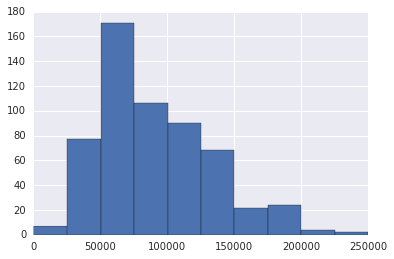

In [101]:
% matplotlib inline
df_sal_year['Salary'].hist()

In [103]:
len(df_sal_year[df_sal_year['Salary'] < 40000])

26

### Dropping rows with salaries less than 40k, ~ 5% of the data (outliers)

In [104]:
df_sal_year= df_sal_year[df_sal_year['Salary'] >= 40000]
len(df_sal_year)

545

In [105]:
min_salary = df_sal_year['Salary'].min()
print min_salary

40000.0


In [106]:
# Mean and Median of salary

mean_ = df_sal_year['Salary'].mean()
median_ = df_sal_year['Salary'].median()

print "Mean Salary =", mean_
print "Median Salary =", median_

Mean Salary = 95061.7440367
Median Salary = 85000.0


## Plotting states with highest average salaries

In [107]:
# Top 10 states with highest median salaries

import numpy as np
% matplotlib inline

sal_pivot = pd.pivot_table(df_sal_year, index = ['State'], values = ['Salary'], aggfunc = [pd.Series.nunique, \
                                                                                           np.median, \
                                                                                           max])
sal_pivot = sal_pivot.sort_values([('median', 'Salary')], ascending = False).head(10)
sal_pivot.reset_index(inplace = True)
state_list = list(sal_pivot['State'])
sal_pivot

State nunique    median       max
         Salary    Salary    Salary
0    NY    32.0  120000.0  225000.0
1    MN     3.0  112500.0  200000.0
2    IL    27.0  112500.0  200000.0
3    MA    17.0  110000.0  160000.0
4    NJ     7.0  107500.0  157500.0
5    NH     1.0  103300.0  103300.0
6    GA    15.0  101553.5  177500.0
7    PA    13.0  100000.0  250000.0
8    IN     4.0  100000.0  130000.0
9    CA    60.0  100000.0  200000.0

In [122]:
df_s = df_sal_year[df_sal_year['State'].isin(state_list)]
df_s.sort_values('Salary', ascending = False, inplace = True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


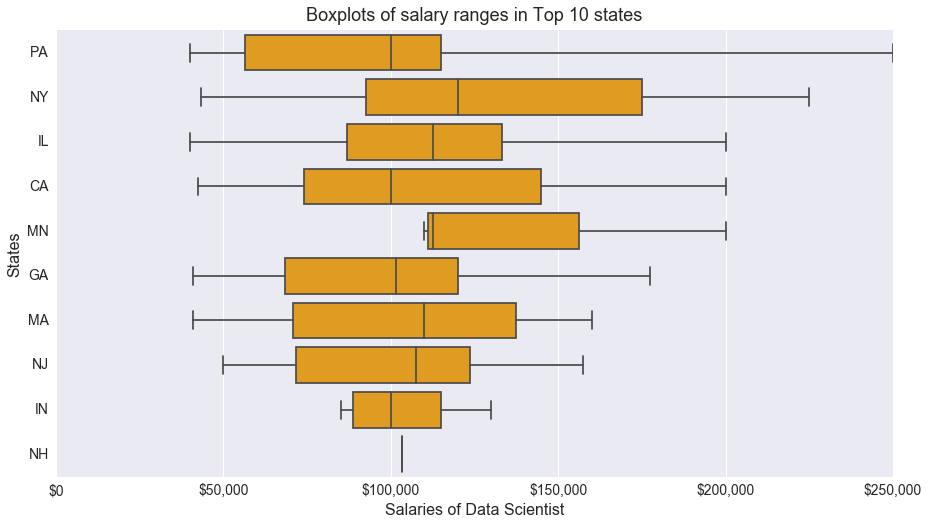

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
ax = sns.boxplot(x='Salary', y="State", data=df_s,
                 whis=np.inf, color="orange")
plt.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Boxplots of salary ranges in Top 10 states', fontsize = 18, y = 1.01)
ax.set_xticklabels(['$0', '$50,000', '$100,000', '$150,000', '$200,000', '$250,000'])
ax.set_xlabel('Salaries of Data Scientist', fontsize = 16)
ax.set_ylabel('States', fontsize = 16)
plt.savefig('boxplot_salary.png')

## Extracting top 20 common words in "Job Title" and "Job Summary" into dummy variables

### Top 20 words in Job Titles

In [126]:
# Renaming columns to strings without space

df_sal_year.columns = ['Job_Title', \
                       'Location', \
                       'Company', \
                       'Salary', \
                       'No_of_Reviews', \
                       'Company_Ratings', \
                       'Job_Summary', \
                       'Salary_Lower', \
                       'Salary_Higher',\
                       'Salary_Frequency',\
                       'State',\
                       'City']

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=20, # Only use the top 20 most common words
)


# This builds a matrix with a row per website (or data point) and column per word (using all words in the dataset)
jobt = v.fit_transform(df_sal_year.Job_Title).todense()
jobt = pd.DataFrame(jobt, columns=v.get_feature_names())
jobt.head()

analyst  associate  clinical  data  engineer  engineering  laboratory  \
0        1          0         0     0         0            0           0   
1        1          0         0     0         0            0           0   
2        0          0         0     0         0            0           0   
3        0          1         0     0         0            0           0   
4        0          0         0     1         0            0           0   

   lead  learning  machine  manager  quantitative  research  scientist  \
0     0         0        0        0             0         1          0   
1     0         0        0        0             0         1          0   
2     0         0        0        0             0         0          1   
3     0         0        0        0             0         0          1   
4     0         0        0        0             0         0          1   

   senior  software  specialist  sr  statistical  statistician  
0       0         0           0   0            0             0  
1       0         0           0   0            0             0  
2       0         0           0   1            0             0  
3       0         0           0   0            0             0  
4       0         0           0   0            0             0

In [128]:
job_word_df = pd.DataFrame(jobt.sum())
job_word_df.columns = ['Count']
job_word_df.sort_values(['Count'],inplace = True)
job_word_df.head()

Count
specialist      14
laboratory      15
clinical        16
software        18
engineering     18

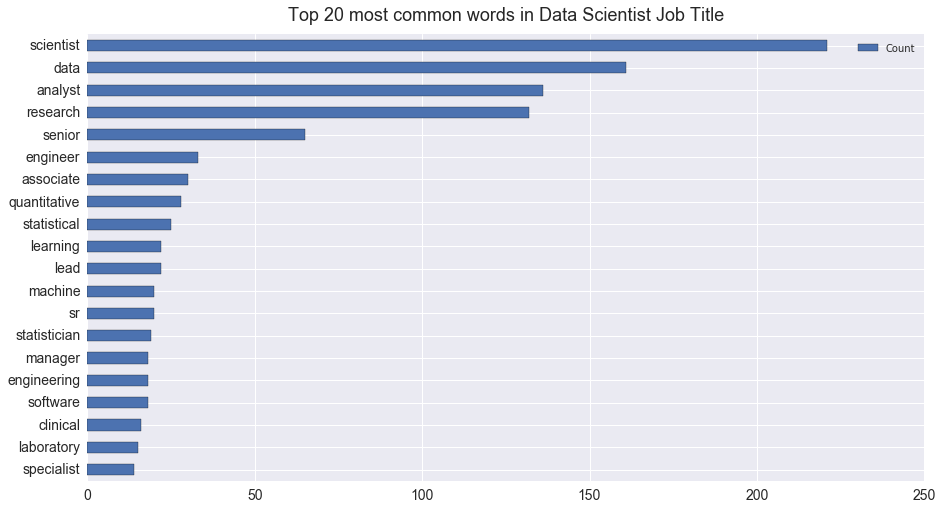

In [129]:
%matplotlib inline
import seaborn as sns

ax = job_word_df.plot(kind = 'barh', figsize = (15,8))
ax.set_title('Top 20 most common words in Data Scientist Job Title', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('20_words_ds_job_title.png')

### Top 20 words in job summarys

In [130]:
jobS = v.fit_transform(df_sal_year.Job_Summary).todense()
jobS = pd.DataFrame(jobS, columns = v.get_feature_names())
jobS.head()

analysis  analyst  analytics  analyze  collection  company  data  \
0         0        0          0        0           0        0     1   
1         0        0          0        0           0        0     1   
2         1        0          0        0           1        0     1   
3         0        0          0        0           0        0     0   
4         0        0          1        0           0        1     1   

   development  experience  looking  management  research  science  scientist  \
0            0           0        0           0         0        0          0   
1            0           0        0           0         1        0          0   
2            0           0        0           0         0        0          0   
3            0           0        0           0         1        0          1   
4            0           0        0           0         0        0          1   

   scientists  senior  statistical  team  work  working  
0           0       0            0     0     0        0  
1           0       0            0     0     0        0  
2           0       0            0     0     0        0  
3           0       0            0     0     0        1  
4           0       0            0     0     0        0

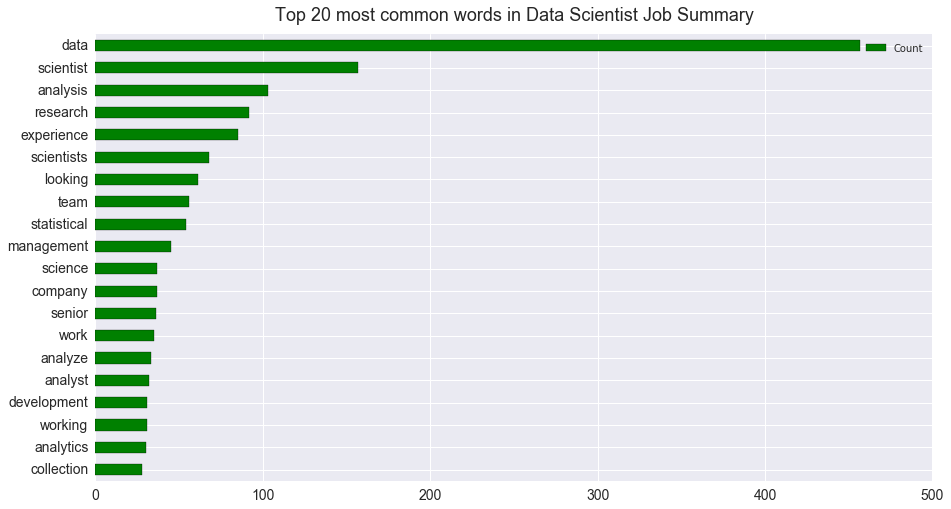

In [131]:
jobS_word_df = pd.DataFrame(jobS.sum())
jobS_word_df.columns = ['Count']
jobS_word_df.sort_values(['Count'],inplace = True)

ax = jobS_word_df.plot(kind = 'barh', figsize = (15,8), color = 'g')
ax.set_title('Top 20 most common words in Data Scientist Job Summary', fontsize = 18, y = 1.02)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('20_words_ds_job_summary.png')

In [132]:
del df_sal_year['Salary_Frequency']

In [133]:
df_sal_year.head(1)

Job_Title     Location                     Company   Salary  \
3  Research Analyst  Hampton, VA  Thomas Nelson Comm College  59630.0   

  No_of_Reviews Company_Ratings  \
3             2              54   

                                         Job_Summary  Salary_Lower  \
3  Primary responsibilities include meeting with ...       55000.0   

   Salary_Higher State     City  
3        64260.0    VA  Hampton

In [134]:
df_sal_year.reset_index(inplace = True, drop = True)

## Creating dummy variables for categorical columns

In [135]:
# Function to return dummy variables for certain columns

# Company name was not included

import patsy

def get_features(dataframe):
    
   features = patsy.dmatrix('~ C(State) + C(City)', dataframe)
   X_df = pd.DataFrame(features, columns=features.design_info.column_names)
   X_df.drop('Intercept', axis=1, inplace=True)
   return X_df

In [136]:
# Creating dummy variables for States and Cities
dff = get_features(df_sal_year)
dff.head()

C(State)[T.AZ]  C(State)[T.CA]  C(State)[T.CO]  C(State)[T.CT]  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   C(State)[T.DC]  C(State)[T.DE]  C(State)[T.FL]  C(State)[T.GA]  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   C(State)[T.HI]  C(State)[T.IL]               ...                 \
0             0.0             0.0               ...                  
1             0.0             0.0               ...                  
2             0.0             0.0               ...                  
3             0.0             0.0               ...                  
4             0.0             0.0               ...                  

   C(City)[T.Union]  C(City)[T.Ventura, C]  C(City)[T.Walnut Creek]  \
0               0.0                    0.0                      0.0   
1               0.0                    0.0                      0.0   
2               0.0                    0.0                      0.0   
3               0.0                    0.0                      0.0   
4               0.0                    0.0                      0.0   

   C(City)[T.Waltham]  C(City)[T.Washington]  C(City)[T.Waukegan]  \
0                 0.0                    0.0                  0.0   
1                 0.0                    0.0                  0.0   
2                 0.0                    0.0                  0.0   
3                 0.0                    0.0                  0.0   
4                 0.0                    0.0                  0.0   

   C(City)[T.West Valley City]  C(City)[T.Westlake Village]  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   C(City)[T.Wilmington]  C(City)[T.Wright-Patterson AFB]  
0                    0.0                              0.0  
1                    0.0                              0.0  
2                    0.0                              0.0  
3                    0.0                              0.0  
4                    0.0                              0.0  

[5 rows x 253 columns]

## Concatenating all dummy variables and original dataframe

In [137]:
dft = pd.concat([df_sal_year, jobt, jobS, dff], axis = 1)
dft.head()

Job_Title     Location  \
0                Research Analyst  Hampton, VA   
1                Research Analyst  Norfolk, VA   
2  Sr. Socio-behavioral Scientist  Norfolk, VA   
3             ASSOCIATE SCIENTIST  Madison, WI   
4                  Data Scientist  Madison, WI   

                           Company    Salary No_of_Reviews Company_Ratings  \
0       Thomas Nelson Comm College   59630.0             2              54   
1              City of Norfolk, VA   44415.0          None            None   
2  Eastern Virginia Medical School   94963.0            35              42   
3  University of Wisconsin-Madison   40861.0            49            53.4   
4              Analytic Recruiting  135500.0             2              51   

                                         Job_Summary  Salary_Lower  \
0  Primary responsibilities include meeting with ...       55000.0   
1  Gathers and analyzes data, develops spreadshee...       33770.0   
2  Duties include managing and supporting proposa...       94963.0   
3  Scientist - Radiological Engineering and Desig...       40861.0   
4  Insurance Company in Wisconsin seeks a full ti...      100000.0   

   Salary_Higher State               ...                C(City)[T.Union]  \
0        64260.0    VA               ...                             0.0   
1        55060.0    VA               ...                             0.0   
2        94963.0    VA               ...                             0.0   
3        40861.0    WI               ...                             0.0   
4       171000.0    WI               ...                             0.0   

   C(City)[T.Ventura, C]  C(City)[T.Walnut Creek]  C(City)[T.Waltham]  \
0                    0.0                      0.0                 0.0   
1                    0.0                      0.0                 0.0   
2                    0.0                      0.0                 0.0   
3                    0.0                      0.0                 0.0   
4                    0.0                      0.0                 0.0   

   C(City)[T.Washington]  C(City)[T.Waukegan]  C(City)[T.West Valley City]  \
0                    0.0                  0.0                          0.0   
1                    0.0                  0.0                          0.0   
2                    0.0                  0.0                          0.0   
3                    0.0                  0.0                          0.0   
4                    0.0                  0.0                          0.0   

   C(City)[T.Westlake Village]  C(City)[T.Wilmington]  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          0.0                    0.0   
3                          0.0                    0.0   
4                          0.0                    0.0   

   C(City)[T.Wright-Patterson AFB]  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                              0.0  

[5 rows x 304 columns]

## Splitting data to train_test set

In [138]:
# Threshold of over median as 1

threshold = median_
print "Median salary =", median_

y = dft['Salary'].apply(lambda x: 1 if x > threshold else 0)
X = dft.copy()

Median salary = 85000.0


In [139]:
X.head(1)

Job_Title     Location                     Company   Salary  \
0  Research Analyst  Hampton, VA  Thomas Nelson Comm College  59630.0   

  No_of_Reviews Company_Ratings  \
0             2              54   

                                         Job_Summary  Salary_Lower  \
0  Primary responsibilities include meeting with ...       55000.0   

   Salary_Higher State               ...                C(City)[T.Union]  \
0        64260.0    VA               ...                             0.0   

   C(City)[T.Ventura, C]  C(City)[T.Walnut Creek]  C(City)[T.Waltham]  \
0                    0.0                      0.0                 0.0   

   C(City)[T.Washington]  C(City)[T.Waukegan]  C(City)[T.West Valley City]  \
0                    0.0                  0.0                          0.0   

   C(City)[T.Westlake Village]  C(City)[T.Wilmington]  \
0                          0.0                    0.0   

   C(City)[T.Wright-Patterson AFB]  
0                              0.0  

[1 rows x 304 columns]

In [140]:
del X['Job_Title']
del X['Job_Summary']
del X['Company']
del X['Salary_Lower']
del X['Salary_Higher']
del X['State']
del X['City']
del X['Location']
del X['Salary']

X.head()

No_of_Reviews Company_Ratings  analyst  associate  clinical  data  engineer  \
0             2              54        1          0         0     0         0   
1          None            None        1          0         0     0         0   
2            35              42        0          0         0     0         0   
3            49            53.4        0          1         0     0         0   
4             2              51        0          0         0     1         0   

   engineering  laboratory  lead               ...                 \
0            0           0     0               ...                  
1            0           0     0               ...                  
2            0           0     0               ...                  
3            0           0     0               ...                  
4            0           0     0               ...                  

   C(City)[T.Union]  C(City)[T.Ventura, C]  C(City)[T.Walnut Creek]  \
0               0.0                    0.0                      0.0   
1               0.0                    0.0                      0.0   
2               0.0                    0.0                      0.0   
3               0.0                    0.0                      0.0   
4               0.0                    0.0                      0.0   

   C(City)[T.Waltham]  C(City)[T.Washington]  C(City)[T.Waukegan]  \
0                 0.0                    0.0                  0.0   
1                 0.0                    0.0                  0.0   
2                 0.0                    0.0                  0.0   
3                 0.0                    0.0                  0.0   
4                 0.0                    0.0                  0.0   

   C(City)[T.West Valley City]  C(City)[T.Westlake Village]  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   C(City)[T.Wilmington]  C(City)[T.Wright-Patterson AFB]  
0                    0.0                              0.0  
1                    0.0                              0.0  
2                    0.0                              0.0  
3                    0.0                              0.0  
4                    0.0                              0.0  

[5 rows x 295 columns]

In [141]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Salary, dtype: int64

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=77)

## Filling reviews and ratings with mean

In [144]:
review_mean = X_train[X_train['No_of_Reviews'] != 'None']['No_of_Reviews'].mean()
print review_mean

135.222222222


In [146]:
rating_mean = X_train[X_train['Company_Ratings'] != 'None']['Company_Ratings'].mean()
print rating_mean

49.1545454545


In [148]:
# Filling "None" review values with mean

X_train.loc[:,'No_of_Reviews'] = X_train['No_of_Reviews'].apply(lambda x: review_mean if x == 'None' else x)

In [149]:
X_train.loc[:,'Company_Ratings'] = X_train['Company_Ratings'].apply(lambda x: rating_mean if x == 'None' else x)

## Scaling columns with continuous values

In [166]:
# Scaling continuous columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train[['No_of_Reviews', "Company_Ratings"]] = \
scaler.fit_transform(X_train[['No_of_Reviews', "Company_Ratings"]])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [167]:
X_train.head()

No_of_Reviews  Company_Ratings  analyst  associate  clinical  data  \
419       0.189579         0.630717        0          0         0     1   
379       0.189579         0.630717        0          0         0     1   
199       0.182203         0.745342        0          0         0     0   
14        0.088983         0.931677        0          0         0     0   
304       0.189579         0.630717        1          0         0     0   

     engineer  engineering  laboratory  lead               ...                 \
419         0            0           0     0               ...                  
379         0            0           0     0               ...                  
199         0            0           0     0               ...                  
14          0            0           0     0               ...                  
304         0            0           0     0               ...                  

     C(City)[T.Union]  C(City)[T.Ventura, C]  C(City)[T.Walnut Creek]  \
419               0.0                    0.0                      0.0   
379               0.0                    0.0                      0.0   
199               0.0                    0.0                      0.0   
14                0.0                    0.0                      0.0   
304               0.0                    0.0                      0.0   

     C(City)[T.Waltham]  C(City)[T.Washington]  C(City)[T.Waukegan]  \
419                 0.0                    0.0                  0.0   
379                 0.0                    0.0                  0.0   
199                 0.0                    0.0                  0.0   
14                  0.0                    0.0                  0.0   
304                 0.0                    0.0                  0.0   

     C(City)[T.West Valley City]  C(City)[T.Westlake Village]  \
419                          0.0                          0.0   
379                          0.0                          0.0   
199                          0.0                          0.0   
14                           0.0                          0.0   
304                          0.0                          0.0   

     C(City)[T.Wilmington]  C(City)[T.Wright-Patterson AFB]  
419                    0.0                              0.0  
379                    0.0                              0.0  
199                    0.0                              0.0  
14                     0.0                              0.0  
304                    0.0                              0.0  

[5 rows x 295 columns]

# Using GridSearchCV with LogisticRegression for modelling

In [168]:
from sklearn.grid_search import GridSearchCV
C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']


gs = GridSearchCV(LogisticRegression(solver='liblinear'),
                 {'C': C_vals,
                 'penalty': penalties},
                 cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [169]:
gs.best_estimator_

LogisticRegression(C=0.33, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [211]:
# Best parameters

gs.best_params_

{'C': 0.33, 'penalty': 'l1'}

In [170]:
# Best scores

gs.best_score_

0.7835616438356164

## Ranking coefficients of model

In [174]:
# Top 20

coef = pd.DataFrame([list(X_train.columns), list(gs.best_estimator_.coef_[0])], index=['features', 'coef']).T
coef.sort_values(by = 'coef', ascending = False, inplace = True)
coef.reset_index(inplace = True)
del coef['index']
coef.head(20)

features      coef
0                       looking   1.43975
1                  quantitative   1.32235
2                          data   1.25435
3                C(State)[T.NY]  0.610233
4                       company  0.533305
5                      engineer  0.395774
6                      learning   0.37949
7                        senior   0.28575
8                          lead  0.185881
9          C(City)[T.Milwaukee]         0
10  C(City)[T.Mountain View, C]         0
11     C(City)[T.Mountain View]         0
12       C(City)[T.Morrisville]         0
13           C(City)[T.Modesto]         0
14       C(City)[T.Minneapolis]         0
15             C(City)[T.Miami]         0
16          C(City)[T.Milpitas]         0
17      C(City)[T.Nashville, T]         0
18              C(City)[T.Mesa]         0
19         C(City)[T.Melbourne]         0

In [175]:
# Bottom 20

coef.tail(20)

features       coef
275                             C(City)[T.Bolling AFB]          0
276                            C(City)[T.Camarillo, C]          0
277                              C(City)[T.Charleston]          0
278                             C(City)[T.Chapel Hill]          0
279                                C(City)[T.Campbell]          0
280  C(City)[T.Cambridge, MA 02141 (East Cambridge ...          0
281                                  C(City)[T.Boston]          0
282                               C(City)[T.Cambridge]          0
283  C(City)[T.Cambridge, MA 02138 (West Cambridge ...          0
284                                C(City)[T.Brisbane]          0
285                             C(City)[T.Bridgewater]          0
286                              C(City)[T.Bridgeport]          0
287                                 C(City)[T.Boulder]          0
288        C(City)[T.Boston, MA 02116 (South End area]          0
289   C(City)[T.Boston, MA 02115 (Fenway-Kenmore area]          0
290                    C(City)[T.Wright-Patterson AFB]          0
291                                          associate -0.0853983
292                                         laboratory  -0.446106
293                                    Company_Ratings  -0.770286
294                                           research   -1.08625

In [176]:
# Checking importance of Company rating

coef[coef['features'] == 'Company_Ratings']

features      coef
293  Company_Ratings -0.770286

This one is interesting - company rating has a negative correlation with salaries. This could possibly be argued that highly rated companies, i.e. popular ones where more people want to work at, have more bargaining power and can be a price setter.

In [177]:
# Checking importance of number of reviews

coef[coef['features'] == 'No_of_Reviews']

features coef
25  No_of_Reviews    0

Essentially saying that salaries are not dependent on the number of reviews on indeed.com

## Sorting out the X_test dataset (See code comments)

In [178]:
# Fill review with mean
# Fill rating with mean
# Scale reviews
# Scale ratings

# Had to do this separatedly so as not to "contaminate" training set

X_test.loc[:,'No_of_Reviews'] = X_test['No_of_Reviews'].apply(lambda x: review_mean if x == 'None' else x)
X_test.loc[:,'Company_Ratings'] = X_test['Company_Ratings'].apply(lambda x: rating_mean if x == 'None' else x)

In [179]:
X_test[['No_of_Reviews', 'Company_Ratings']] = \
scaler.fit_transform(X_test[['No_of_Reviews', "Company_Ratings"]])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Predicting X_test

In [180]:
y_pred2 = gs.best_estimator_.predict(X_test)
y_score2 = gs.best_estimator_.decision_function(X_test)

In [195]:
# Checking performance of model
import numpy as np


conmat = np.array(confusion_matrix(y_test, y_pred2, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['over_Median', 'under_Median'],
                            columns=['predicted_overMedian','predicted_underMedian'])

print(confusion)
print
print
print classification_report(y_test,y_pred2)
roc_auc_score(y_test, y_score2)


              predicted_overMedian  predicted_underMedian
over_Median                     65                     26
under_Median                    12                     77


             precision    recall  f1-score   support

          0       0.75      0.87      0.80        89
          1       0.84      0.71      0.77        91

avg / total       0.80      0.79      0.79       180



0.8558464007902209

## Plotting performance of model

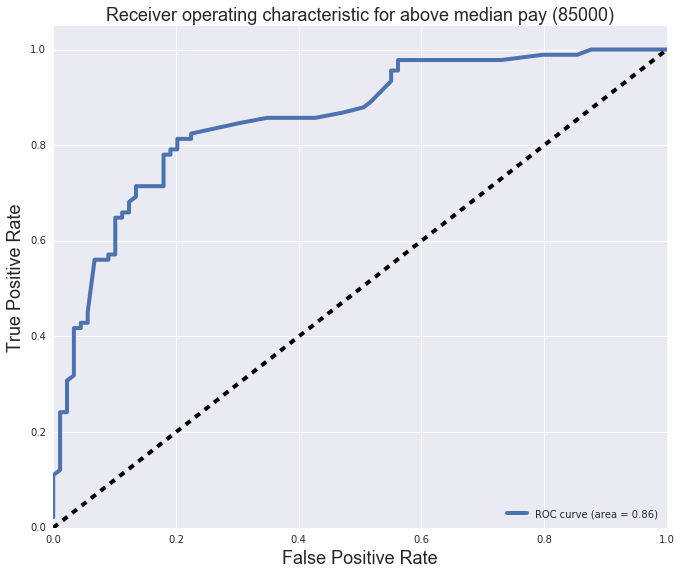

In [235]:
import matplotlib.pyplot as plt

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# Find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score2)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for above median pay (%i)' % median_, fontsize=18)
plt.legend(loc="lower right")
plt.savefig('roc_logreg.png')
plt.show();


# Adjusting threshold to lower false positive rate

#### Minimise occurences of calling a "low salary" job a "high salary" one

## Probability vector

In [219]:
# Get the predicted probability vector

y_df = pd.DataFrame(gs.best_estimator_.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
print(y_df.iloc[0:10])
print(len(X_test), len(y_df))

   class_0_pp  class_1_pp
0    0.834027    0.165973
1    0.111015    0.888985
2    0.559058    0.440942
3    0.075334    0.924666
4    0.381294    0.618706
5    0.527482    0.472518
6    0.521994    0.478006
7    0.292789    0.707211
8    0.307000    0.693000
9    0.440838    0.559162
(180, 180)


In [220]:
# Setting threshold to accept prediction for Median pay at 0.95 instead of 0.5

y_df['pred_class_threshigh'] = [1 if x >= 0.95 else 0 for x in y_df.class_1_pp.values]
print(y_df.iloc[0:10])

   class_0_pp  class_1_pp  pred_class_threshigh
0    0.834027    0.165973                     0
1    0.111015    0.888985                     0
2    0.559058    0.440942                     0
3    0.075334    0.924666                     0
4    0.381294    0.618706                     0
5    0.527482    0.472518                     0
6    0.521994    0.478006                     0
7    0.292789    0.707211                     0
8    0.307000    0.693000                     0
9    0.440838    0.559162                     0


In [222]:
# Confusion matrix

conmat_high = np.array(confusion_matrix(y_test, y_df.pred_class_threshigh.values, labels=[1,0]))

confusion_high = pd.DataFrame(conmat_high, index=['over_Median', 'under_Median'],
                            columns=['predicted_overMedian','predicted_underMedian'])

print(confusion_high)

              predicted_overMedian  predicted_underMedian
over_Median                      6                     85
under_Median                     0                     89


In [224]:
cls_rephigh = classification_report(y_test, y_df.pred_class_threshigh.values)
print cls_rephigh

             precision    recall  f1-score   support

          0       0.51      1.00      0.68        89
          1       1.00      0.07      0.12        91

avg / total       0.76      0.53      0.40       180



#### Comments:

While false positive rate was minimized, false negative rate consequently increased. There were more occurences where the model wrongly called a high-salary job a low-one.

Personal blogpost -- 
[Project4_personal_blogpost]('https://peidacai.github.io/articles/General-Assembly-Project04')